In [1]:
# imports for array-handling and plotting
import numpy as np
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
%matplotlib inline

# let's keep our keras backend tensorflow quiet
#import os
#os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
# for testing on CPU
#os.environ['CUDA_VISIBLE_DEVICES'] = ''

# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

ModuleNotFoundError: No module named 'keras'

In [11]:
#%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


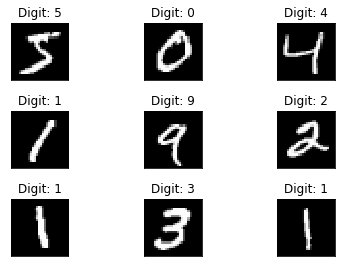

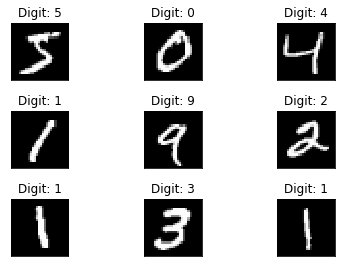

In [12]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

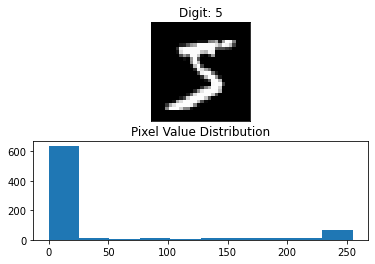

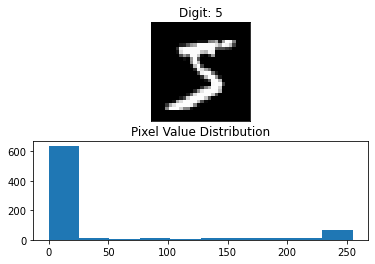

In [13]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")
fig

In [14]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [15]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


In [16]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [17]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

2023-08-27 14:22:43.885859: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [20]:
import os

In [23]:
# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))



Epoch 1/20
469/469 - 2s - loss: 0.0086 - accuracy: 0.9978 - val_loss: 0.1126 - val_accuracy: 0.9848 - 2s/epoch - 3ms/step
Epoch 2/20
469/469 - 2s - loss: 0.0085 - accuracy: 0.9977 - val_loss: 0.1016 - val_accuracy: 0.9860 - 2s/epoch - 4ms/step
Epoch 3/20
469/469 - 2s - loss: 0.0091 - accuracy: 0.9977 - val_loss: 0.1129 - val_accuracy: 0.9841 - 2s/epoch - 4ms/step
Epoch 4/20
469/469 - 2s - loss: 0.0076 - accuracy: 0.9978 - val_loss: 0.1049 - val_accuracy: 0.9864 - 2s/epoch - 4ms/step
Epoch 5/20
469/469 - 2s - loss: 0.0090 - accuracy: 0.9977 - val_loss: 0.1112 - val_accuracy: 0.9836 - 2s/epoch - 4ms/step
Epoch 6/20
469/469 - 2s - loss: 0.0067 - accuracy: 0.9979 - val_loss: 0.1138 - val_accuracy: 0.9856 - 2s/epoch - 4ms/step
Epoch 7/20
469/469 - 2s - loss: 0.0057 - accuracy: 0.9984 - val_loss: 0.1015 - val_accuracy: 0.9866 - 2s/epoch - 4ms/step
Epoch 8/20
469/469 - 2s - loss: 0.0091 - accuracy: 0.9975 - val_loss: 0.1102 - val_accuracy: 0.9864 - 2s/epoch - 4ms/step
Epoch 9/20
469/469 - 2s 

In [25]:
#mnist_model = load_model()
loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 0s - loss: 0.1257 - accuracy: 0.9847 - 325ms/epoch - 1ms/step
Test Loss 0.12571369111537933
Test Accuracy 0.9847000241279602


In [31]:
# load the model and create predictions on the test set
#model = load_model()
predicted_classes = model.predict(X_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")


313/313 [==============================] - 1s 1ms/step

0  classified correctly
1  classified incorrectly


/var/folders/j1/klm8dx2j4dqff1377yrwmknm0000gn/T/ipykernel_24006/3938451450.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  correct_indices = np.nonzero(predicted_classes == y_test)[0]
/var/folders/j1/klm8dx2j4dqff1377yrwmknm0000gn/T/ipykernel_24006/3938451450.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  incorrect_indices = np.nonzero(predicted_classes != y_test)[0]


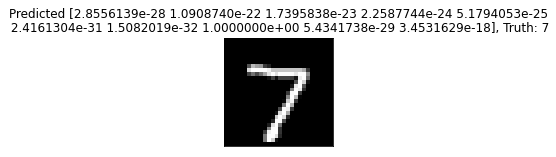

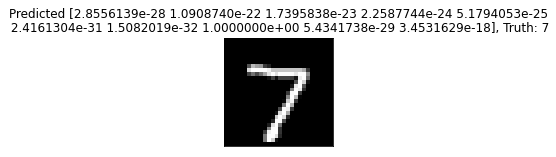

In [32]:
# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation